# Basic Thing to Plot Instrument Status

In [1]:
import pandas as pd
import pyMAP as pm
%matplotlib notebook

In [2]:
jill = pm.jill()

Jill Username: jsx54
········


Define function to load all data of the desired type from repo

In [33]:
# these are oudated data integration functions not used in this analysis

def all_data(csv_repo,dat_load = ['ILO_IFB','ILO_TOF_BD','ILO_RAW_CNT','TOF_DE_sample']):
    stuff = [pm.data.load(csv_repo,
                dtype = dt) for dt in dat_load]
    return(stuff[0].join(stuff[1:]).dropna(axis = 0))

def join_dat(x,rebase = 'TOF_DE_sample',integrate = []):
    return(x[rebase].join(x[integrate].values).interpolate(axis =0))
#     return(stuff)

def integrate_dat(stuff,rebase = 'TOF_DE_sample',integrate = []):
    stuff['dat'] = stuff.apply(lambda x: x[rebase].join(x[integrate].values).interpolate(method = 'index',axis =0),axis = 1)
    return(stuff)

def load_n_merge(csv_repo,dat_load = ['ILO_IFB','ILO_TOF_BD','ILO_RAW_CNT','TOF_DE_sample'],
                 rebase = 'TOF_DE_sample',bin_sec=5):
    stuff = {dt:pm.data.load(csv_repo,
                dtype = dt) for dt in dat_load}
    integrate = [l for l in dat_load if l !=rebase]
    dat = stuff[rebase].join([stuff[l] for l in integrate])#.dropna(axis = 0)

    def integrate_func(x):
        dat = x[rebase].join(x[integrate].values).interpolate(method = 'index',axis =0)
        bins = np.linspace(dat.index.min(),dat.index.max(),int((dat.index.max()-dat.index.min())/bin_sec))
        inds = np.digitize(dat.index,bins)-1
        return(dat.reset_index().groupby(inds).median().set_index('SHCOARSE'))
    dat.dropna(axis = 0,inplace = True)
    dat['dat'] = dat.apply(integrate_func,axis = 1)
    return(dat.drop(columns = dat_load))

# Plot Sample Instrument Status Data

select desired run

Combine both runs and plot all efficiencies

In [30]:
from pyMAP.pyMAP.jill.data_groups import plt_groups

def plot_data(df,smooth = 10):
        plt.close('all')
        axss = []
        fig,axs = plt.subplots(len(plt_grps.keys()),sharex = True)
        fig.set_size_inches(10,len(axs)*4)
        for lab,vals,ax in zip(plt_grps.keys(),plt_grps.values(),axs):
            for y in plt_grps[lab]['yplt']:
                ax.plot(dat.sort_index()[y].rolling(smooth).median(),label = y)
            ax.set_ylabel(lab)
            ax.legend()

        axs[-1].set_xlabel(['dateTime'])
        return(axss)
    

In [31]:
dat = jill.queryWhen('ILO_EM_status','2023-01-16 21:42','2023-01-16 21:52')

<IPython.core.display.Javascript object>


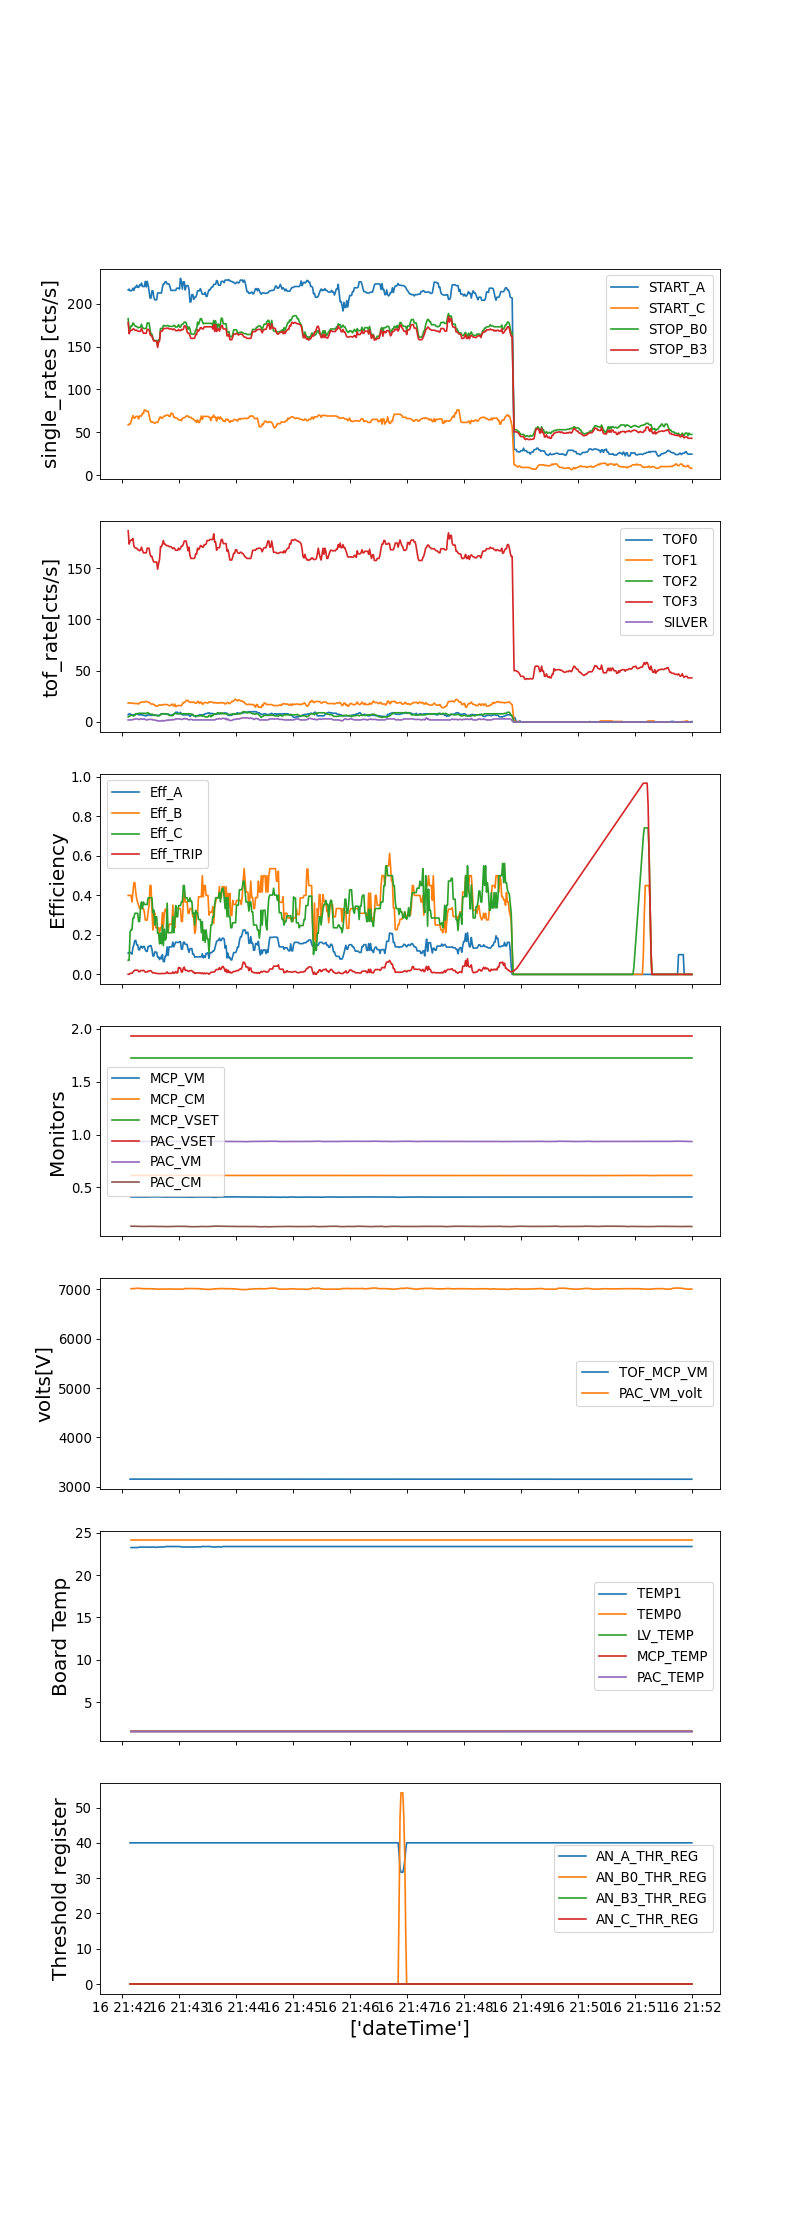

[]

In [32]:
plot_data(dat)

- Finding a small correlation between the 